CODE BLOCK: 1
Install the required modules:

In [1]:
!pip install torch torchvision

Import the necessary modules:

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Download the model and utils files:


 https://github.com/rajayourfriend/EraV2_S5_Assignment

In [6]:
!wget https://raw.githubusercontent.com/rajayourfriend/EraV2_S5_Assignment/main/model.py
!wget https://raw.githubusercontent.com/rajayourfriend/EraV2_S5_Assignment/main/utils.py
!ls model.py
!ls utils.py

--2024-02-22 00:42:30--  https://raw.githubusercontent.com/rajayourfriend/EraV2_S5_Assignment/main/model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1003 [text/plain]
Saving to: ‘model.py’

model.py            100%[===================>]    1003  --.-KB/s    in 0s      

2024-02-22 00:42:31 (67.1 MB/s) - ‘model.py’ saved [1003/1003]

--2024-02-22 00:42:31--  https://raw.githubusercontent.com/rajayourfriend/EraV2_S5_Assignment/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4568 (4.5K) [text/plain]
Saving to: ‘u

CODE BLOCK: 2
Import the model and utils modules:

In [7]:
!ls /content/utils.py
!ls /content/model.py
!pwd

/content/utils.py
/content/model.py
/content


In [8]:
import model
import utils


In [9]:
# CUDA?
utils.isCudaAvailable()

CUDA Available? True


True

CODE BLOCK: 3

In [10]:
# Train data transformations
train_transforms = utils.getTrainTransforms()

# Test data transformations
test_transforms = utils.getTestTransforms()

CODE BLOCK: 4

In [11]:
train_data = utils.getTrainDataset(train_transforms)

test_data = utils.getTestDataset(test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 112153695.13it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41499038.65it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32865676.29it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20353129.03it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [12]:
batch_size = 512

train_loader = utils.getTrainLoader(batch_size, train_data)

test_loader = utils.getTestLoader(batch_size, test_data)


CODE BLOCK: 6

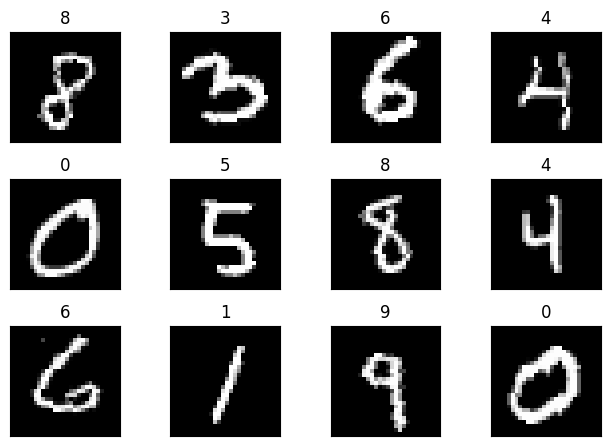

In [13]:
utils.plotImages(train_loader)

CODE BLOCK: 7

In [14]:

use_cuda = utils.isCudaAvailable()
device = utils.getDevice(use_cuda)
model = model.Net2().to(device)
utils.printSummary(model, (1, 28, 28))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


CODE BLOCK: 8

In [15]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [16]:
#model = Net().to(device)
optimizer = utils.getOptimizer(model, lr=0.01, momentum=0.9)
scheduler = utils.getScheduler(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
#num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = utils.train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test_acc, test_losses = utils.test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4289 Batch_id=117 Accuracy=42.38: 100%|██████████| 118/118 [00:19<00:00,  6.21it/s]


Test set: Average loss: 0.3436, Accuracy: 9034/10000 (90.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1793 Batch_id=117 Accuracy=92.16: 100%|██████████| 118/118 [00:20<00:00,  5.87it/s]


Test set: Average loss: 0.1112, Accuracy: 9652/10000 (96.52%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2254 Batch_id=117 Accuracy=95.71: 100%|██████████| 118/118 [00:20<00:00,  5.87it/s]


Test set: Average loss: 0.0685, Accuracy: 9789/10000 (97.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1405 Batch_id=117 Accuracy=96.89: 100%|██████████| 118/118 [00:19<00:00,  6.10it/s]


Test set: Average loss: 0.0507, Accuracy: 9849/10000 (98.49%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1241 Batch_id=117 Accuracy=97.38: 100%|██████████| 118/118 [00:19<00:00,  5.95it/s]


Test set: Average loss: 0.0476, Accuracy: 9835/10000 (98.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0168 Batch_id=117 Accuracy=97.82: 100%|██████████| 118/118 [00:20<00:00,  5.79it/s]


Test set: Average loss: 0.0394, Accuracy: 9879/10000 (98.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0231 Batch_id=117 Accuracy=97.98: 100%|██████████| 118/118 [00:20<00:00,  5.83it/s]


Test set: Average loss: 0.0370, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1117 Batch_id=117 Accuracy=98.16: 100%|██████████| 118/118 [00:19<00:00,  6.01it/s]


Test set: Average loss: 0.0321, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0061 Batch_id=117 Accuracy=98.16: 100%|██████████| 118/118 [00:20<00:00,  5.81it/s]


Test set: Average loss: 0.0341, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0223 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [00:20<00:00,  5.72it/s]


Test set: Average loss: 0.0315, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0327 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:20<00:00,  5.77it/s]


Test set: Average loss: 0.0264, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1040 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [00:19<00:00,  5.94it/s]


Test set: Average loss: 0.0244, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0378 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:19<00:00,  5.91it/s]


Test set: Average loss: 0.0234, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0210 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:20<00:00,  5.81it/s]


Test set: Average loss: 0.0225, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0470 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:20<00:00,  5.78it/s]


Test set: Average loss: 0.0225, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0716 Batch_id=117 Accuracy=99.05: 100%|██████████| 118/118 [00:19<00:00,  5.96it/s]


Test set: Average loss: 0.0196, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0259 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:19<00:00,  6.02it/s]


Test set: Average loss: 0.0198, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0085 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:20<00:00,  5.73it/s]


Test set: Average loss: 0.0196, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0528 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:20<00:00,  5.75it/s]


Test set: Average loss: 0.0196, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0090 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:19<00:00,  5.91it/s]


Test set: Average loss: 0.0192, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

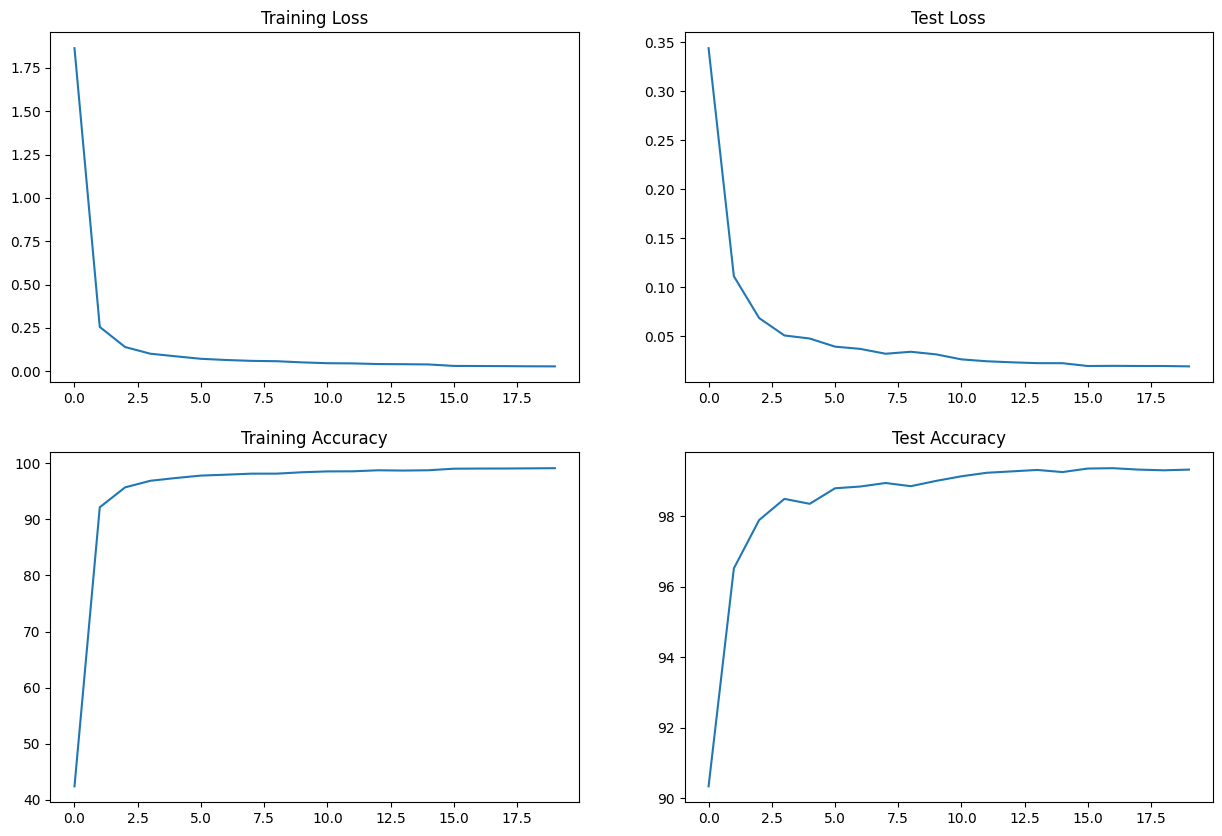

In [17]:
utils.plotResults(train_losses, train_acc, test_losses, test_acc)